In [73]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [22]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data , columns=wine.feature_names)
df_wine['class_label'] = wine.target
x = df_wine.iloc[:,0:-1].values
y = df_wine.iloc[:,-1].values
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=1 , stratify = y)

In [23]:
svm_pipe = make_pipeline(StandardScaler() , SVC(random_state= 1))

In [24]:
svm_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [25]:
svm_pipe.score(x_test, y_test)

0.9814814814814815

In [30]:
param_range = [ 0.001 , 0.01, 0.1 , 1 , 10, 100]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, 
              {'svc__C': param_range, 'svc__gamma': param_range,'svc__kernel': ['rbf']}]

In [31]:
gsv = GridSearchCV( estimator = svm_pipe, param_grid = param_grid, scoring='accuracy', cv=10)

In [33]:
gs = gsv.fit(x_train, y_train)

In [34]:
gs.best_score_

0.9919354838709677

In [35]:
gs.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [37]:
gs.score(x_test,y_test)

1.0

In [57]:
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data , columns = cancer.feature_names)


In [58]:
cancer_df['class_label'] = cancer.target
x_c = cancer_df.iloc[:,0:-1].values
y_c = cancer_df.iloc[:,-1].values


In [59]:
x_train_c , x_test_c , y_train_c , y_test_c = train_test_split(x_c, y_c, test_size=0.2, random_state=1 , stratify = y)

In [60]:
svm_pipe.fit(x_train_c,y_train_c)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [61]:
gsc_c = GridSearchCV(estimator = svm_pipe, param_grid = param_grid, scoring='accuracy' , cv=10)

In [62]:
gsc_c.fit(x_train_c, y_train_c)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__kernel': ['linear']}, {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
gsc_c.best_params_

{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [64]:
gsc_c.best_score_

0.9758241758241758

In [65]:
gsc_c.score(x_test_c,y_test_c)

0.9824561403508771

In [67]:
gsc_c_confmat = confusion_matrix(gsc_c.predict(x_test) , y_test)

In [68]:
gsc_c_confmat

array([[40,  0],
       [ 2, 72]], dtype=int64)

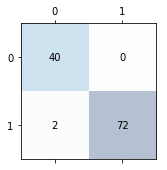

In [72]:
fig , ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(gsc_c_confmat , cmap = plt.cm.Blues , alpha = 0.3)
for i in range(gsc_c_confmat.shape[0]):
    for j in range (gsc_c_confmat.shape[1]):
        ax.text( x = j , y = i , s= gsc_c_confmat[i,j] , va = 'center' , ha ='center')
plt.show()

In [78]:
score_cv = cross_val_score(estimator = svm_pipe, X = x_train_c, y=y_train_c, cv=10, n_jobs=1)
                        

In [79]:
score_cv

array([1.        , 0.97826087, 0.95652174, 0.97826087, 0.91304348,
       1.        , 0.95555556, 0.97777778, 0.97777778, 1.        ])